**CHATGPT Review Analysis **

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df=pd.read_csv("/content/chatgpt_reviews.csv")
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Month']=df['Review Date'].dt.month_name()
df['Day']=df['Review Date'].dt.day
df['Date']=df['Review Date'].dt.date
df['Time']=df['Review Date'].dt.time
df['Hour']=df['Review Date'].dt.hour
df.head()
df.head()

,Review Id,Review,Ratings,Review Date,Month,Day,Date,Time,Hour
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,August,23,2024-08-23,19:30:05,19
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,August,23,2024-08-23,19:28:18,19
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,August,23,2024-08-23,19:22:59,19
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,August,23,2024-08-23,19:20:50,19
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,August,23,2024-08-23,19:20:39,19


**Remove Non text Symbols In Reviews**


In [25]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002500-\U00002BEF"
        "\U00002700-\U000027BF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA70-\U0001FAFF"
        "\U00002600-\U000026FF"
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', str(text))

df['Clean_Review'] = df['Review'].apply(remove_emojis)
df['Clean_Review'] = df['Clean_Review'].str.replace(r'\s+', ' ', regex=True).str.strip()
top_ratings=df.sort_values(by='Ratings',ascending=False)
number_of_reviews=df.groupby('Ratings').size()
number_of_reviews.head()
top_ratings.head()

,Review Id,Review,Ratings,Review Date,Month,Day,Date,Time,Hour,Clean_Review
196726,0151001d-b81c-41b5-8927-f56738989625,expert application,5,2023-11-30 18:11:41,November,30,2023-11-30,18:11:41,18,expert application
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,August,23,2024-08-23,19:30:05,19,good
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,August,23,2024-08-23,19:28:18,19,good
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,August,23,2024-08-23,19:22:59,19,nice app
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,August,23,2024-08-23,19:20:50,19,"nice, ig"


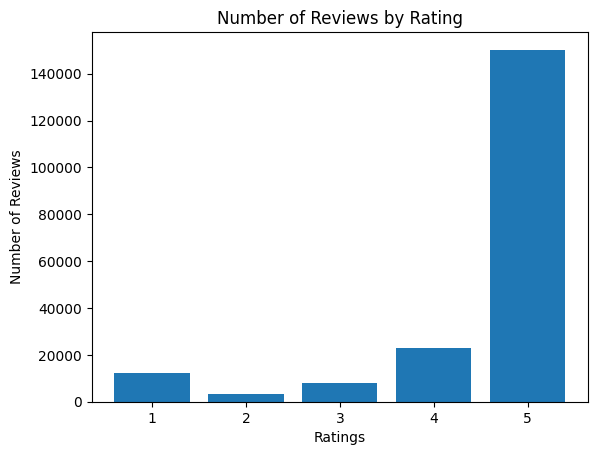

In [26]:
plt.bar(number_of_reviews.index,number_of_reviews.values)
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Rating')
plt.show()

**Insights**

*   Rating 5 dominates the reviews by a large margin.


*  Lower ratings (1 to 4) are much less frequent.




** Average Rating Over Time**

In [27]:
daily_avg_rating = df.groupby(df['Date'])['Ratings'].mean()
daily_avg_rating.head()

,Ratings
Date,
2023-07-25,4.601852
2023-07-26,4.387356
2023-07-27,4.302872
2023-07-28,4.036585
2023-07-29,4.290323


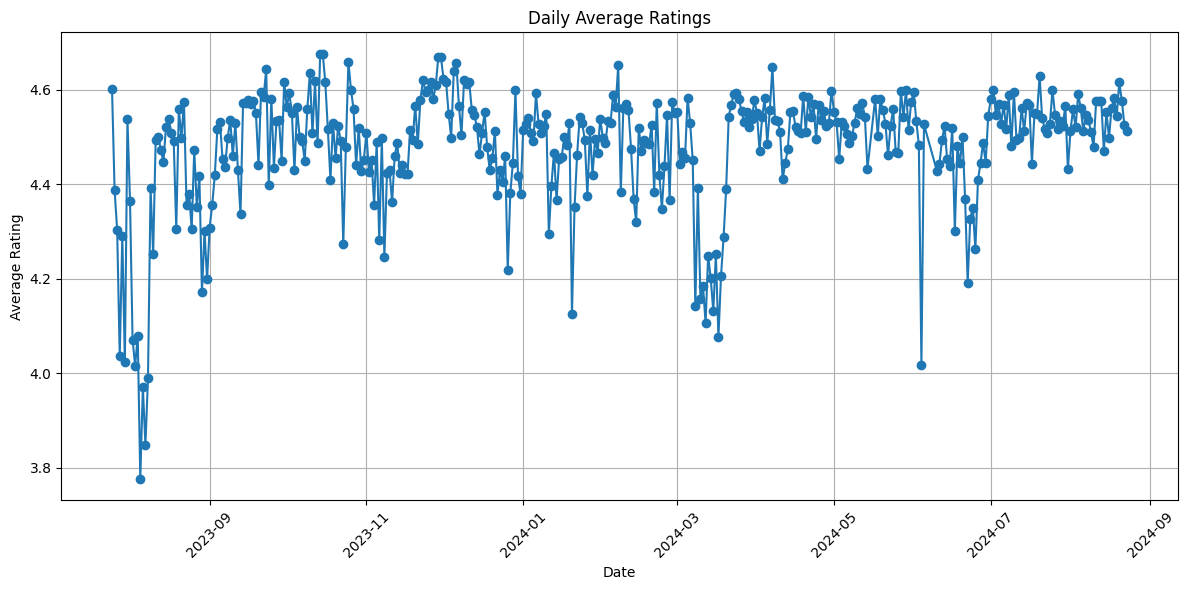

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_rating.index, daily_avg_rating.values, marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Daily Average Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Average Rating Over Time:**

You might see stable trends or noticeable drops/spikes indicating user satisfaction or issues on specific days.

**Number of Reviews Over Time**

In [29]:
daily_review_count = df.groupby(df['Date']).size()
daily_review_count.head()

,0
Date,
2023-07-25,3132
2023-07-26,1993
2023-07-27,1149
2023-07-28,574
2023-07-29,279


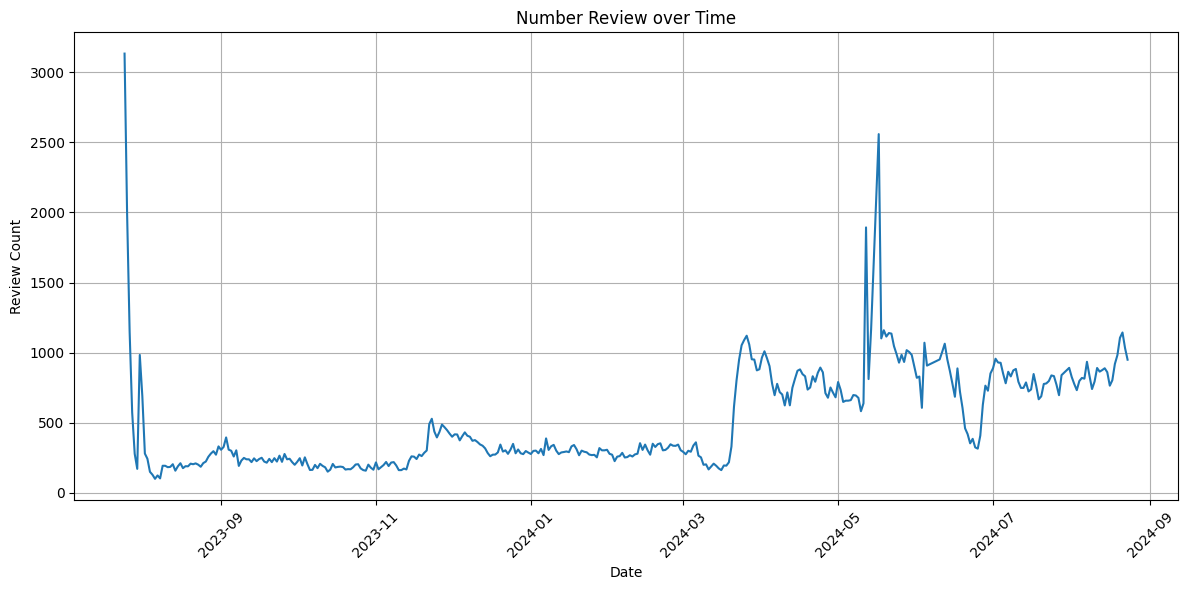

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(daily_review_count.index, daily_review_count.values)

plt.xlabel('Date')
plt.ylabel('Review Count')
plt.title('Number Review over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Number of Reviews Over Time**:

Peaks may correspond with product launches, updates, or promotions.

Dips could suggest weekends, holidays, or downtime.

**Sentimental Analysis**

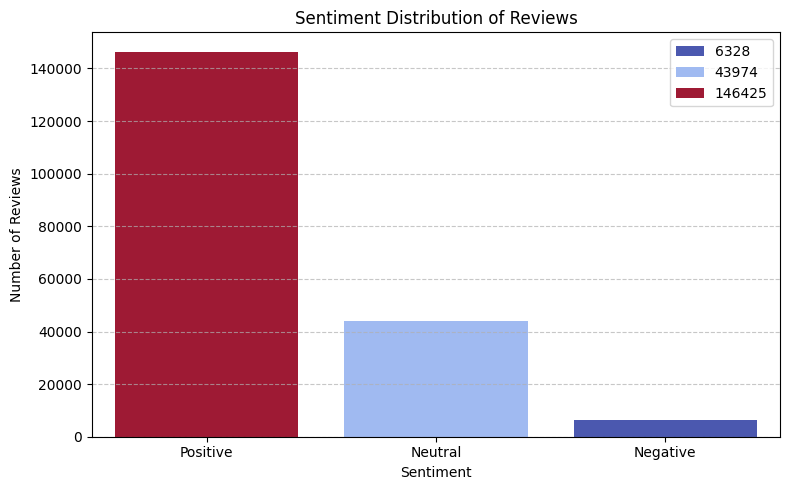

In [31]:
from textblob import TextBlob
import seaborn as sns


df['Sentiment_Polarity'] = df['Clean_Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(label_sentiment)
sentiment_counts = df['Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, hue=sentiment_counts.values,y=sentiment_counts.values, palette='coolwarm')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**Detect Common Probelem In Negative Reveiw**

In [32]:
negative_reviews = df[df['Ratings'] <= 2]
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
negative_reviews = df[df['Ratings'] <= 2].copy()
negative_reviews['Cleaned'] = negative_reviews['Review'].apply(clean_text)



In [33]:
from collections import Counter

word_list = " ".join(negative_reviews['Cleaned']).split()
word_counts = Counter(word_list)

# Top 20 common words
common_words = word_counts.most_common(20)
for word, count in common_words:
    print(f"{word}: {count}")


it: 7744
the: 7700
i: 7105
to: 6524
and: 5310
is: 4794
app: 4374
a: 3851
not: 3668
this: 3483
in: 2813
for: 2528
of: 2439
its: 2213
my: 2191
but: 2189
you: 1936
good: 1710
that: 1693
me: 1685


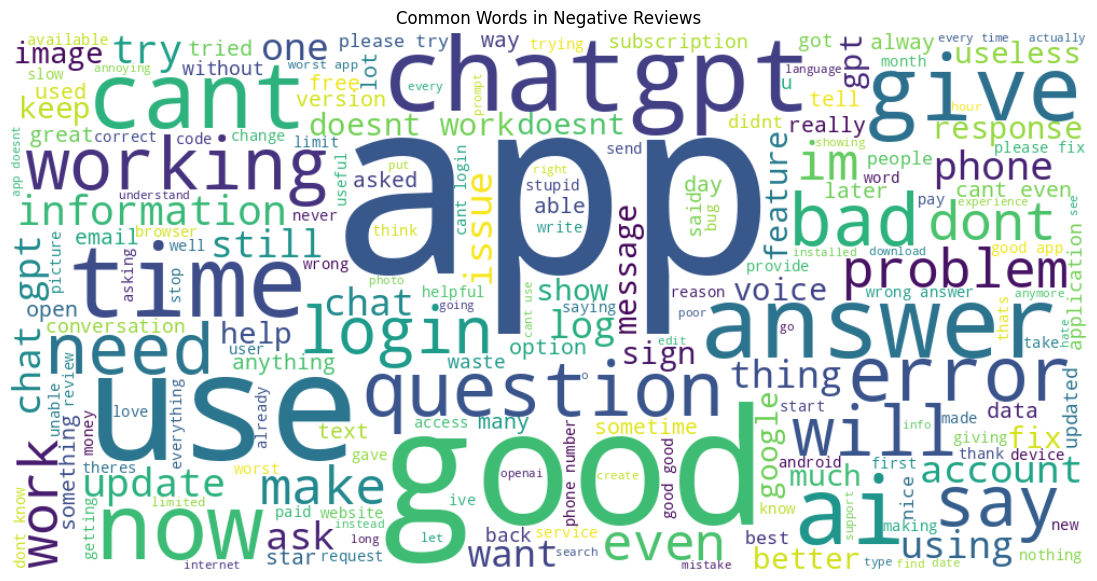

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(negative_reviews['Cleaned']))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative Reviews")
plt.show()

**Sentimental Over Time**

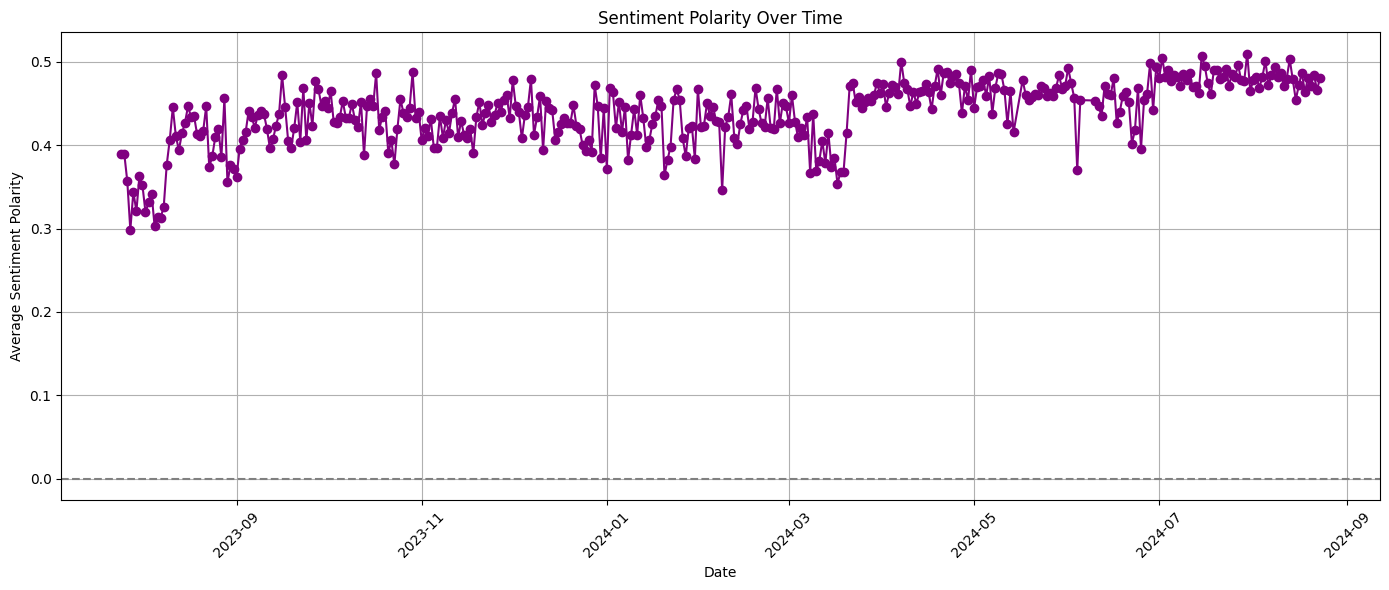

In [35]:
daily_sentiment = df.groupby(df['Date'])['Sentiment_Polarity'].mean()
plt.figure(figsize=(14, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, color='purple', marker='o', linestyle='-')
plt.title("Sentiment Polarity Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.axhline(0, color='gray', linestyle='--')  # Neutral line
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Time Based Analysis**

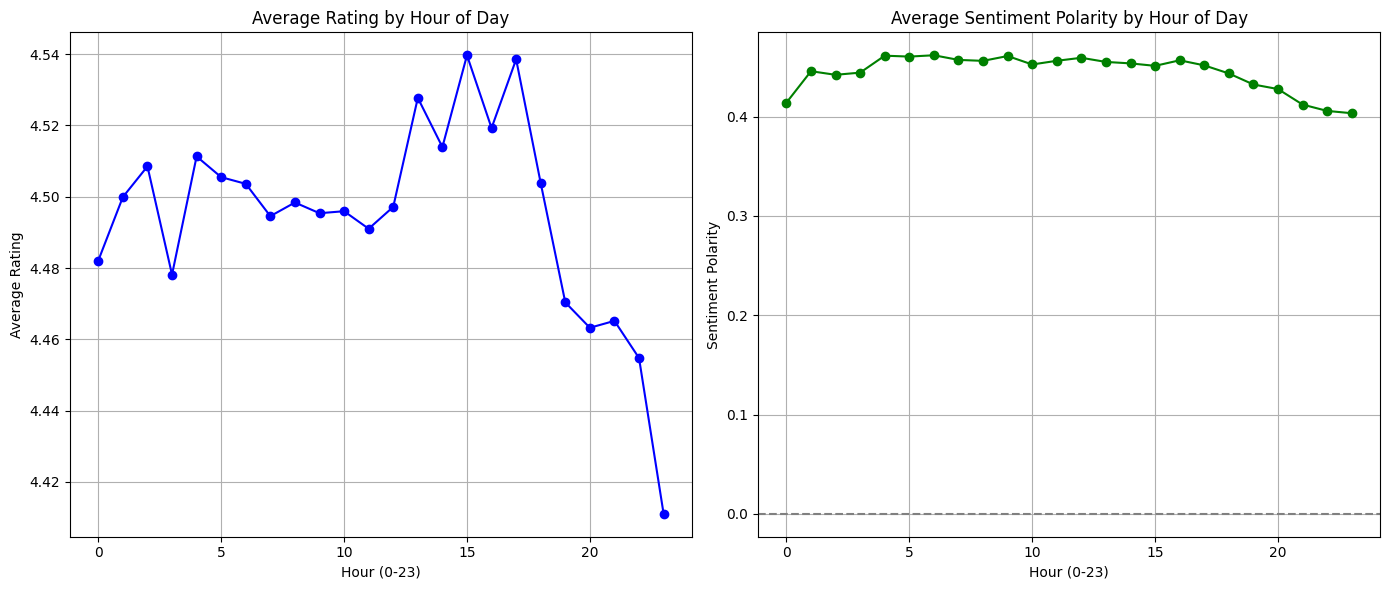

In [37]:
hourly_rating = df.groupby('Hour')['Ratings'].mean()
hourly_sentiment = df.groupby('Hour')['Sentiment_Polarity'].mean()
plt.figure(figsize=(14, 6))

# Average Rating by Hour
plt.subplot(1, 2, 1)
hourly_rating.plot(kind='line', marker='o', color='blue')
plt.title("Average Rating by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Average Rating")
plt.grid(True)

# Average Sentiment by Hour
plt.subplot(1, 2, 2)
hourly_sentiment.plot(kind='line', marker='o', color='green')
plt.title("Average Sentiment Polarity by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

**Insights from Time-Based Analysis**

📈** Average Rating by Hour of Day**

*   Ratings are consistently high throughout the day, especially from evening to late night (6 PM–11 PM).
This suggests users are generally most satisfied during leisure hours, likely when they’re using the app more thoughtfully.



😊 **Average Sentiment Polarity by Hour **


*   Sentiment shows a slight dip in early morning hours (around 2–5 AM).
*   Sentiment peaks again in the late afternoon and evening, possibly due to more casual, less frustrated users during this time.


> Add blockquote








**Interpretation**:

**Positive feedback** is strongest during evenings, when users are likely relaxed and have more time.

**Negative sentiment ** spikes may correspond to technical issues or frustrated usage during odd hours.